<a href="https://colab.research.google.com/github/soyoonjeong/deeplearning_from_scratch/blob/main/ch5_%EC%88%9C%ED%99%98%EC%8B%A0%EA%B2%BD%EB%A7%9D(RNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%cd /content/drive/My Drive/

/content/drive/My Drive


In [3]:
import numpy as np

문제점) 피드포워드 신경망 (흐름이 단방향) => 시계열 데이터의 성질(패턴)을 충분히 학습할 수 없음<br>
해결책) 순환신경망(RNN)

# 확률과 언어 모델 

## word2vec을 확률 관점에서 바라보다 

word2vec의 CBOW 모델<BR>
=> 맥락으로부터 타깃을 정확하게 추측  <BR>
=> 단어의 의미가 인코딩된 '단어의 분산 표현' 획득 

- 맥락을 좌우 대칭으로 생각

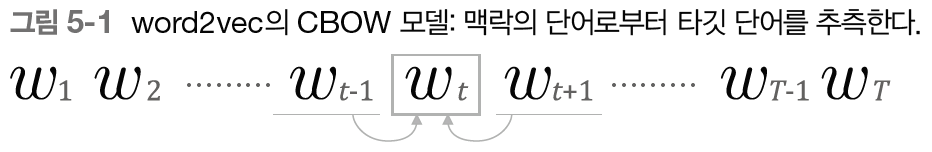

Wt-1과 Wt+1이 주어졌을 때 타깃이 Wt가 될 확률 

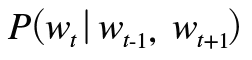

- 맥락을 왼쪽 윈도우만으로 한정 

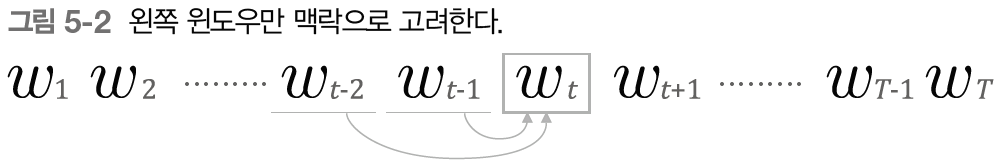

Wt-1과 Wt-2이 주어졌을 때 타깃이 Wt가 될 확률 

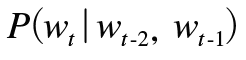

- CBOW 모델이 다루는 손실 함수 (교차 엔트로피 오차) 

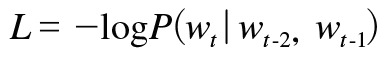

## 언어 모델

: 특정한 단어의 시퀀스에 대해서 그 시퀀스가 일어날 가능성이 어느 정도인지(얼마나 자연스러운 단어 순서인지)를 확률로 평가 <BR>
=> 단어 순서의 자연스러움을 확률적으로 평가 

: 기계 번역이나 음성인식, 문장 생성 등에 쓰임 

- 단어가 w1, w2, ..., wm이라는 순서로 출현할 확률 (동시 확률) <br>
=> 사후 확률의 총곱 (곱셈 정리 (P(A,B) = P(A|B)P(B) 로부터 유도)<br>
=> 사후 확률 : 타깃 단어보다 왼쪽에 있는 모든 단어를 맥락으로 했을 때의 확률 


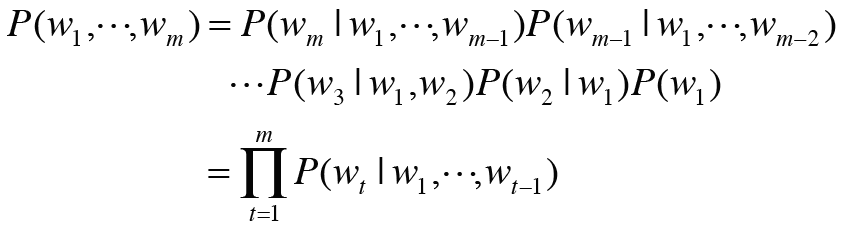

=> 목표는 P(wt|w1, ..., wt-1)이라는 확률 얻기 (동시확률 구하기 위해서)

## CBOW 모델을 언어 모델로? 

- CBOW 모델을 언어 모델에 적용하려면 맥락의 크기를 특정 값으로 한정하여 근사적으로 나타낼 수 있음 
- 마르코프 연쇄 : 미래의 상태가 현재 상태에만 의존해 결정되는 것 
- 문제점) 왼쪽 10개의 단어를 맥락으로 CBOW 모델을 만든다고 하면 그 맥락보다 더 왼쪽에 있는 단어의 정보는 무시됨 (맥락의 크기 한정)
- 해결책) 맥락의 크기를 키우면 되지 않을까..?
- 또다른 문제점) 맥락 안의 단어 순서가 무시됨 (은닉층에서 단어 벡터들이 더해짐)
- 또다른 해결책) 맥락의 단어 벡터를 은닉층에서 연결하는 방식 
- 또또다른 문제점) 연결하는 만큼 맥락의 크기에 비례해 가중치 매개변수도 늘어남 
- 최종적 해결책) **RNN** (맥락이 아무리 길더라도 맥락의 정보 기억) 

# RNN이란

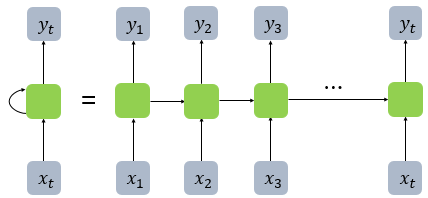

- 각 시각의 RNN 계층은 그 계층으로의 입력과 1개 전의 RNN 계층으로부터의 출력을 받음 
- 은닉층의 메모리 셀은 각 시점에서 바로 이전 시점에서의 은닉층의 메모리 셀에서 나온 값(**은닉상태**)을 자신의 입력으로 사용하는 재귀적 활동을 함 
- 현재 시점 t에서의 메모리 셀이 갖고 있는 값은 과거의 메모리 셀들의 값에 영향을 받음 

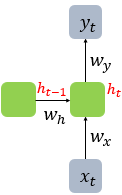

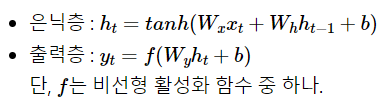

## BPTT

: 시간 방향으로 펼친 신경망의 오차역전파법 (Backpropagation Through Time)

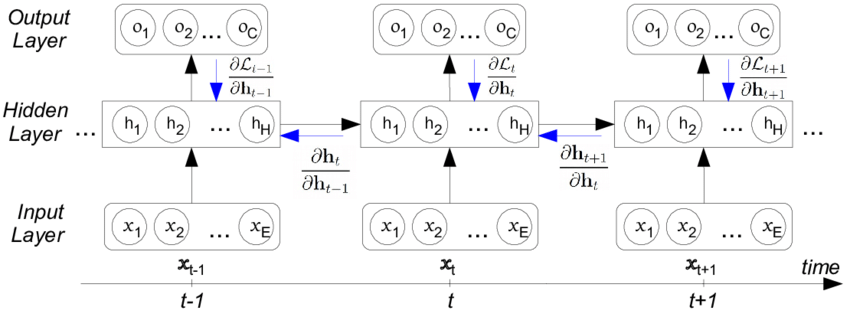

- 시계열 데이터의 시간 크기가 커지는 것에 비례하여 BPTT가 소비하는 컴퓨팅 자원이 증가함 
- 시계열 데이터의 시간 크기가 커지는 것에 비례하여 역전파 시의 기울기가 불안정해짐 
  - Vanishing Gradient : 계층이 길어짐에 따라 신경망 하나 통과할 때마다 기울기 값이 조금씩 작아져서 이전 시간 t까지 역전파되기 전에 0이 되어 소멸할 수도 있음 

##### 순전파 <BR>


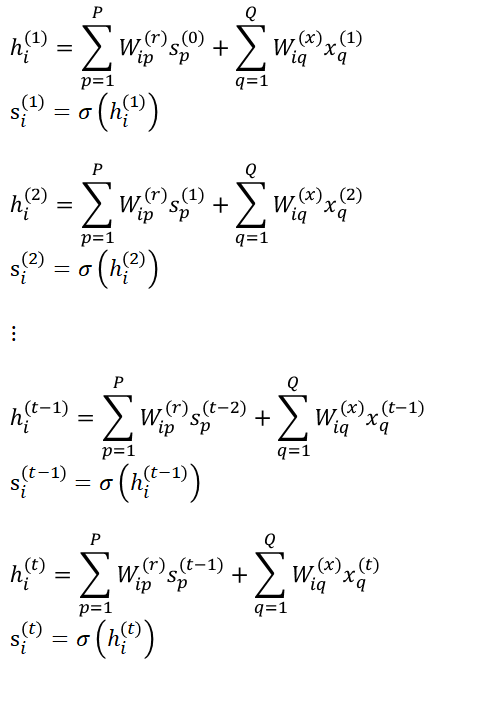

마지막 t번째 시점의 데이터로부터 output을 구하면

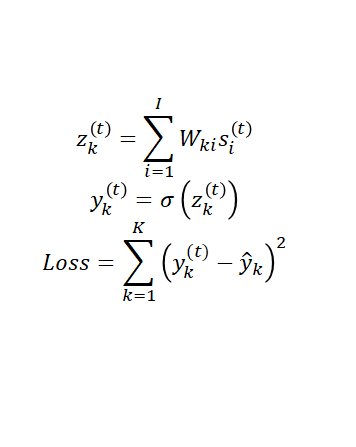

##### hidden state에 연산되는 가중치를 위한 기울기 
체인룰을 적용하여 가중치에 대한 미분을 진행할 수 있음

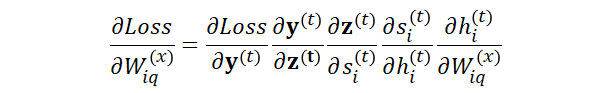

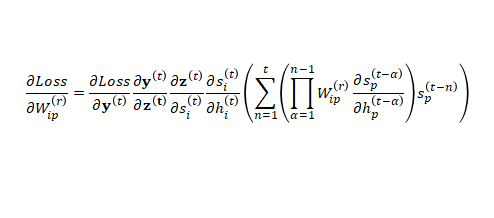

##### input vector에 연산되는 가중치를 위한 기울기 

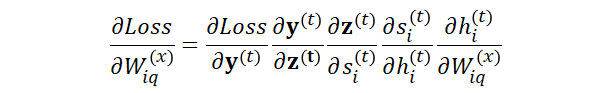

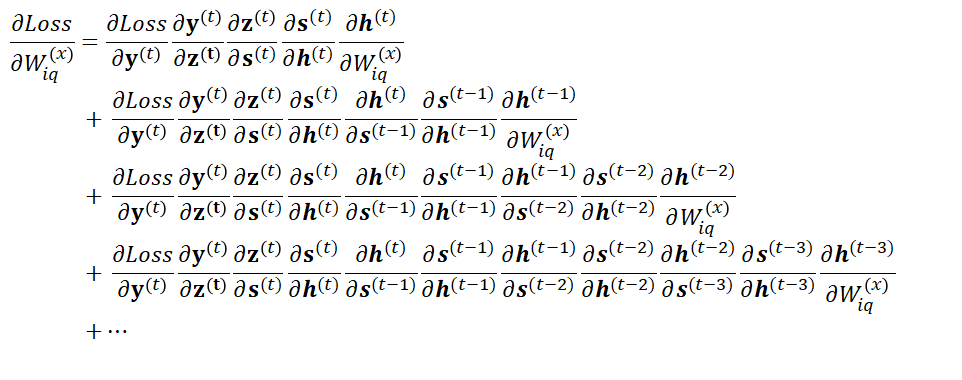

각 시점에서 발생한 hidden state까지의 미분값을 모두 합친 것으로 정리됨 

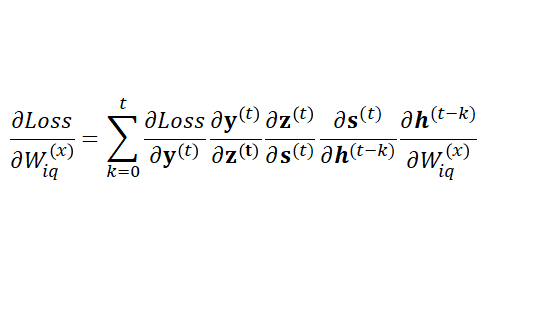

## Truncated BPTT

- 순전파의 흐름은 끊어지지 않고 전파되되, 역전파의 연결은 적당한 길이로 잘라내 그 잘라낸 신경망 단위로 학습을 수행 
- 각각의 블록 단위로 미래의 블록과는 독립적으로로 오차역전파를 완결시킴 

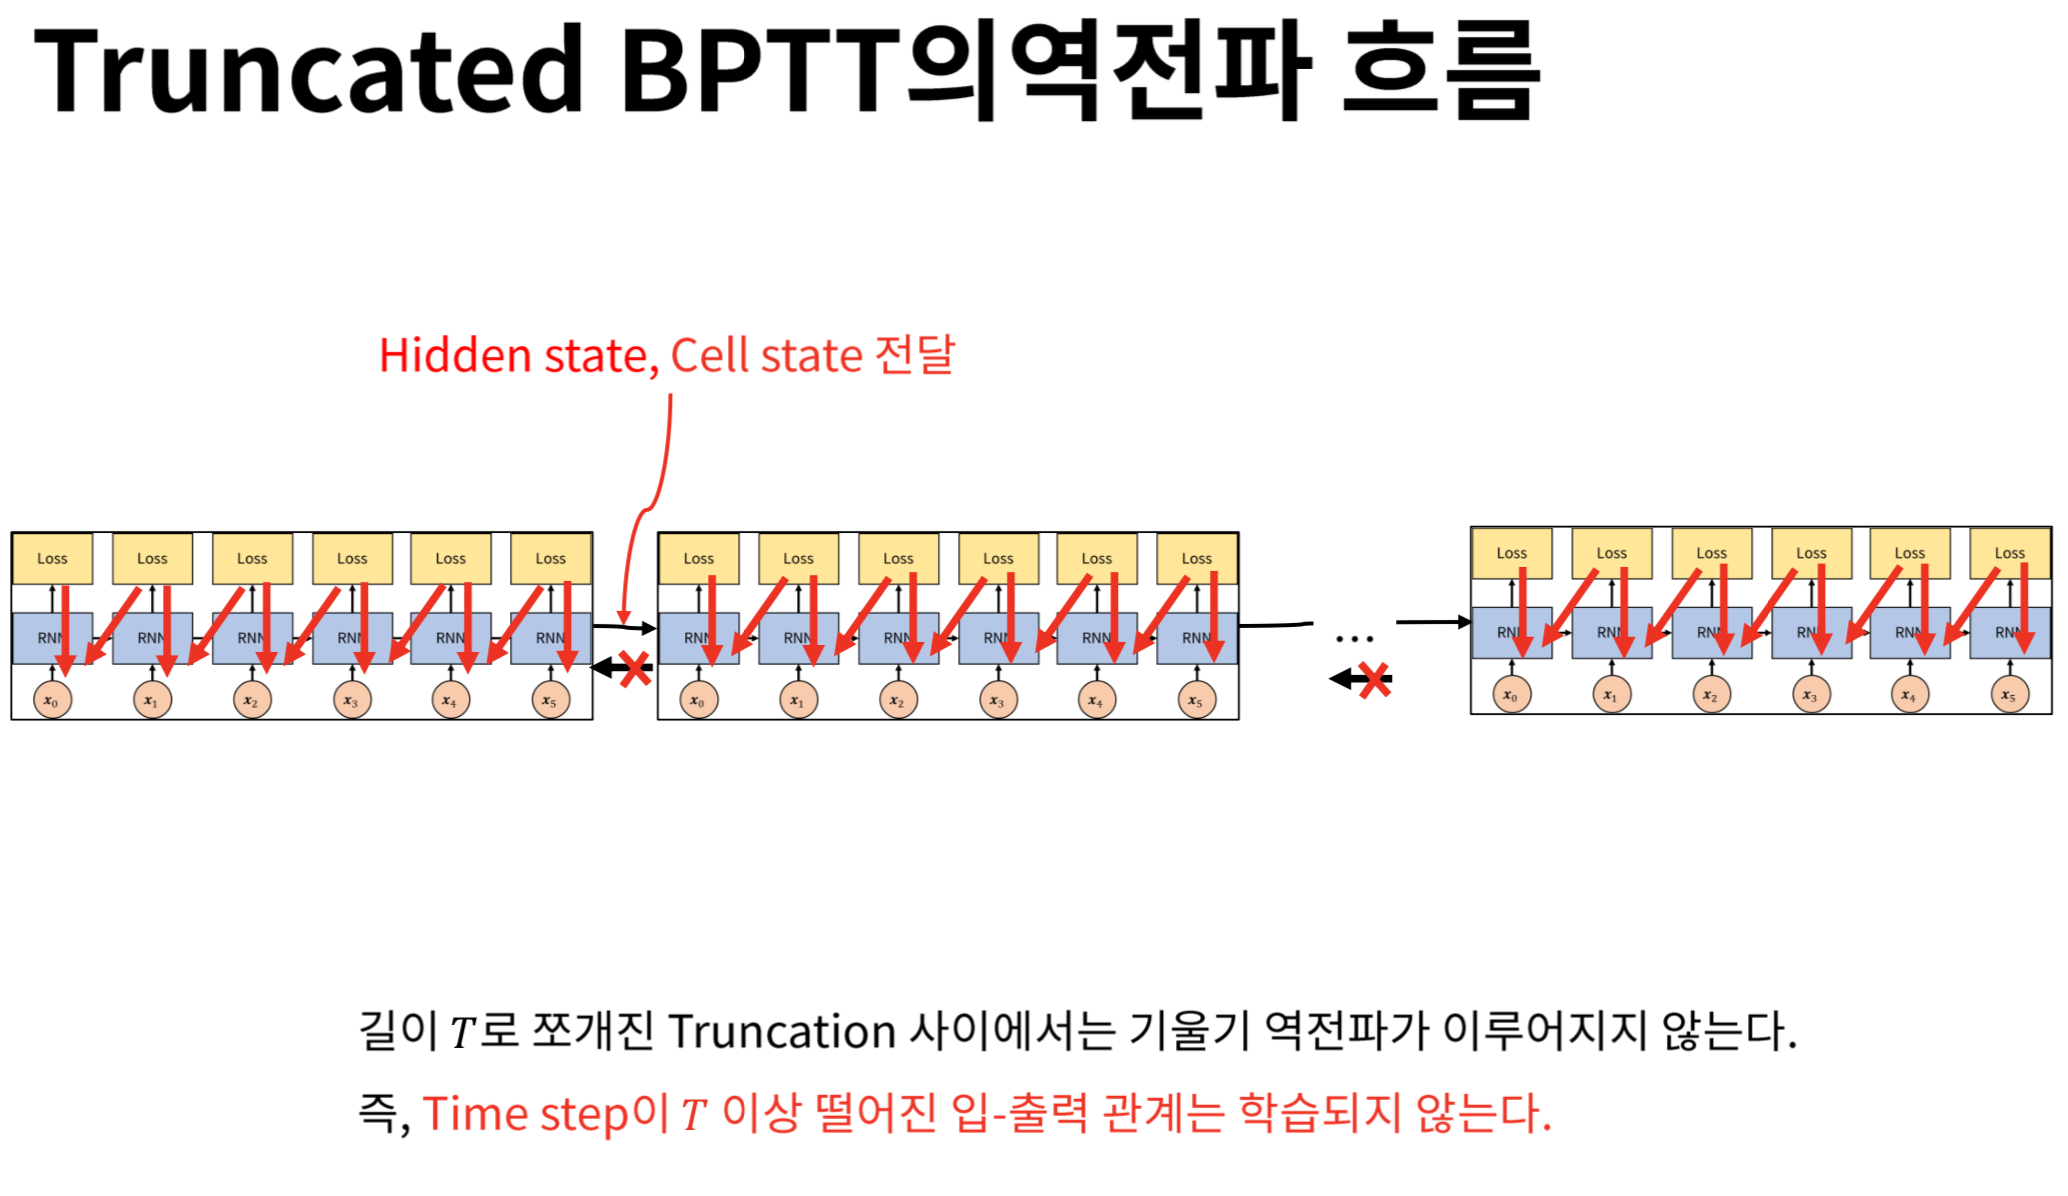

- 데이터를 순서대로 입력하며 은닉 상태를 계승하면서 학습 수행 
- 미니배치별로 데이터를 주는 시작 위치를 각 미니배치의 시작 위치로 옮겨줘야 함함

# RNN 구현 

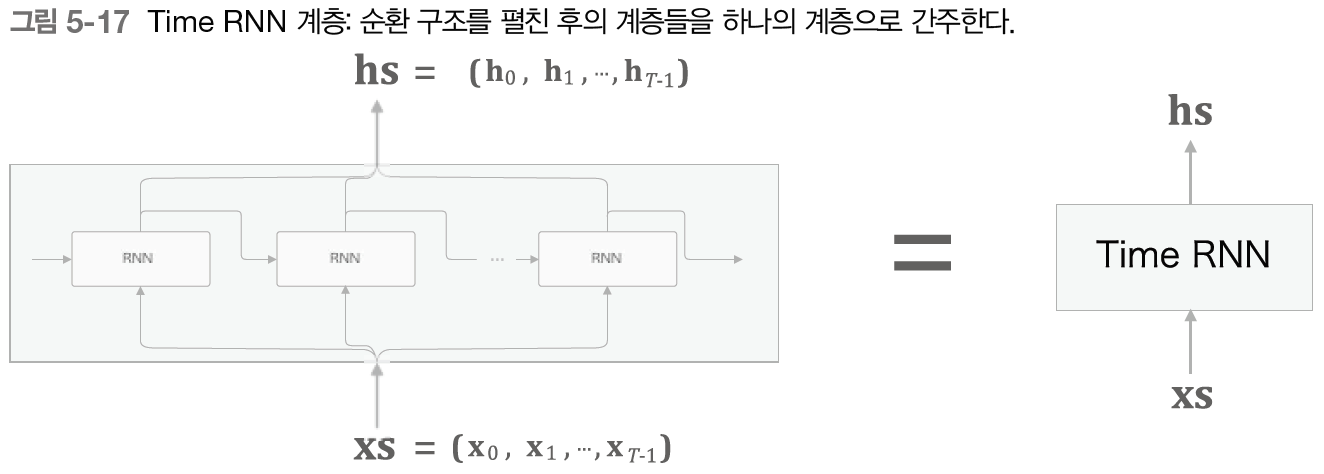

- RNN 계층 : 한 단계의 작업을 수행하는 계층
- Time RNN 계층 : T개 단계분의 작업을 한꺼번에 처리하는 계층 

## RNN 계층 구현 

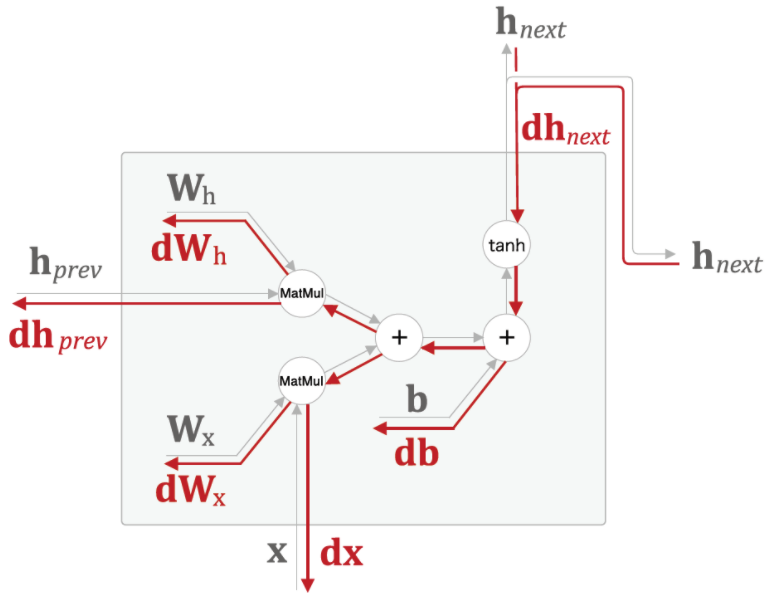

In [4]:
class RNN:
  def __init__(self, Wx, Wh, b):
    self.params = [Wx, Wh, b]
    self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)]
    self.cache = None

  def forward(self, x, h_prev):
    Wx, Wh, b = self.params
    t = np.matmul(h_prev, Wh) + np.matmul(x, Wx) + b
    h_next = np.tanh(t)

    # 역전파 계산 시 사용하는 중간 데이터를 담을 cache
    self.cache = (x, h_prev, h_next) 

    return h_next
  
  def backward(self, dh_next):
    Wx, Wh, b = self.params
    x, h_prev, h_next = self.cache

    dt = dh_next * (1- h_next ** 2)
    db = np.sum(dt, axis = 0)
    dWh = np.matmul(h_prev.T, dt)
    dh_prev = np.matmul(dt, Wh.T)
    dWx = np.matmul(x.T, dt)
    dx = np.matmul(dt, Wx.T)

    self.grads[0][...] = dWx
    self.grads[1][...] = dWh
    self.grads[2][...] = db

    return dx, dh_prev

## Time RNN 계층 구현 

은닉 상태 h를 인스턴스 변수로 유지하여 다음 블록에 인계 

In [5]:
class TimeRNN:
  def __init__(self, Wx, Wh, b, stateful = False):
    self.params = [Wx, Wh, b]
    self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)]
    self.layers = None # 다수의 RNN 계층 리스트로 저장 

    self.h, self.dh = None, None # h : 마지막 RNN 계층의 은닉 상태 저장, dh : 역전파 시 하나 앞 블록의 은닉 상태의 기울기를 저장 
    self.stateful = stateful # 은닉 상태 유지 여부 

  def set_state(self, h):
    self.h = h

  def reset_state(self):
    self.h = None

  def forward(self, xs): # xs : 입력, T개 분량의 시계열 데이터를 하나로 모은 것 
    Wx, Wh, b = self.params
    N, T, D = xs.shape
    D, H = Wx.shape

    self.layers = []
    hs = np.empty((N, T, H), dtype = 'f') # 출력값 담을 그릇 

    if not self.stateful or self.h is None:
      self.h = np.zeros((N, H), dtype = 'f')

    for t in range(T):
      layer = RNN(*self.params) # RNN 한 계층 
      self.h = layer.forward(xs[:, t, :], self.h) # 은닉 상태 계산 
      hs[:, t, :] = self.h
      self.layers.append(layer)

    return hs

  def backward(self, dhs):
    Wx, Wh, b = self.params
    N, T, H = dhs.shape
    D, H = Wx.shape

    dxs = np.empty((N, T, D), dtype = 'f')
    dh = 0
    grads = [0, 0, 0]
    for t in reversed(range(T)):
      layer = self.layers[t]
      dx, dh = layer.backward(dhs[:, t, :] + dh) # 합산된 기울기 (미래 계층으로부터의 기울기, 위로부터의 기울기 )
      # 순전파 시 분기했을 경우, 그 역전파에서는 각 기울기가 합산되어 전해짐
      dxs[:, t, :] = dx

      for i, grad in enumerate(layer.grads):
        grads[i] += grad
      
    for i, grad in enumerate(grads):
      self.grads[i][...] = grad

    self.dh = dh

    return dxs # 하류로 흘려보낼 기울기를 담을 그릇 



- forward()가 불리면 인스턴스 변수 h에는 마지막 RNN 계층의 은닉 상태 저장
- 다음번 forward() 호출 시 stateful이 True라면 먼저 저장된 h값이 그대로 이용, False라면 h가 영행렬로 초기화 
- RNN 계층들이 같은 가중치를 사용하고 있음, Time RNN 계층의 가중치의 기울기는 각 RNN 계층의 가중치 기울기를 모두 더한 것 

# 시계열 데이터 처리 계층 구현 

- Embedding 계층 : 단어 id를 단어의 분산 표현으로 변환, rnn 계층에 입력
- RNN 계층 : 은닉 상태를 다음 층(위쪽)으로 출력, 다음 시각의 RNN 계층(오른쪽)으로 출력
- Affine 계층
- Softmax 계층 

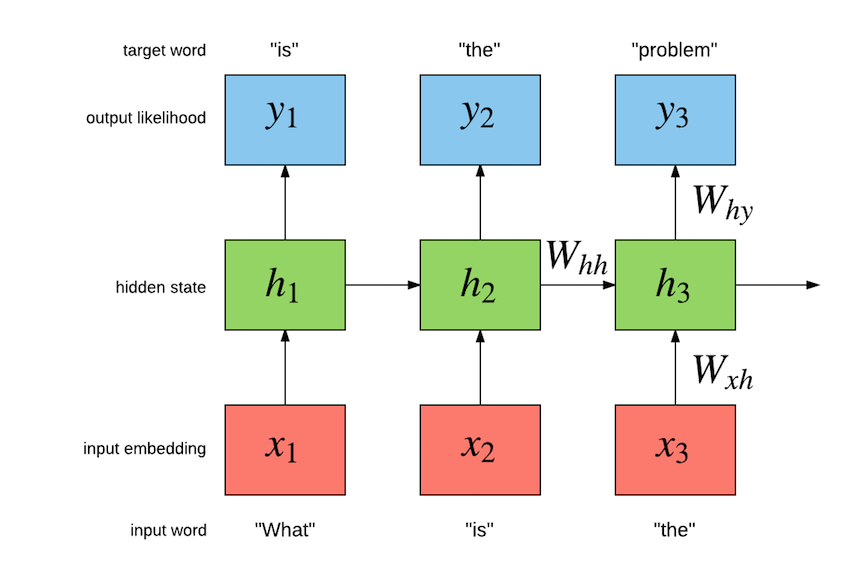

- RNNLM은 지금까지 입력된 단어를 **기억**하고 그것을 바탕으로 다음에 출현할 단어를 예측 
- RNN은 과거의 정보를 응집된 은닉 상태 벡터로 저장해둠
- RNN 계층이 과거에서 현재로 데이터를 계속 흘려보내줌으로써 과거의 정보를 인코딩해 저장(기억)할 수 있음 

# RNNLM 학습과 평가 

## RNNLM 구현 

In [6]:
# chap05/simple_rnnlm.py
import sys
sys.path.append('..')
import numpy as np
from common.time_layers import *


class SimpleRnnlm:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn
        
        # 가중치 초기화 (Xavier initialization)
        embed_W = (rn(V, D) / 100).astype('f')
        rnn_Wx = (rn(D, H) / np.sqrt(D)).astype('f')
        rnn_Wh = (rn(H, H) / np.sqrt(H)).astype('f')
        rnn_b = np.zeros(H).astype('f')
        affine_W = (rn(H, V) / np.sqrt(H)).astype('f')
        affine_b = np.zeros(V).astype('f')
        
        # 계층 생성
        self.layers = [
            TimeEmbedding(embed_W),
            TimeRNN(rnn_Wx, rnn_Wh, rnn_b, stateful=True),
            TimeAffine(affine_W, affine_b),
        ]
        self.loss_layer = TimeSoftmaxWithLoss()
        self.rnn_layer = self.layers[1]
        
        # 모든 가중치와 기울기를 리스트에 모은다.
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads
            
    def forward(self, xs, ts):
        for layer in self.layers:
            xs = layer.forward(xs)
        loss = self.loss_layer.forward(xs, ts)
        return loss
    
    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout
    
    def reset_state(self):
        self.rnn_layer.reset_state()

## 언어 모델의 평가 

**퍼플렉서티(perplexity)** : 언어 모델의 예측 성능을 평가하는 척도로 자주 이용
- 확률의 역수 
- 분기 수(다음에 취할 수 있는 선택사항의 수)로 해석 
- 퍼플렉서티가 작을수록 분기 수가 작고 정답 단어를 높은 확률로 예측하기에 좋은 모델 <br>
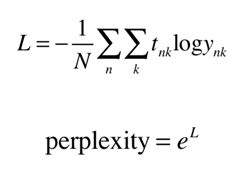

## RNNLM 학습 

말뭉치 크기: 1000, 어휘 수: 418
| 에폭 1 | 퍼플렉서티 383.94
| 에폭 2 | 퍼플렉서티 259.88
| 에폭 3 | 퍼플렉서티 225.99
| 에폭 4 | 퍼플렉서티 216.12
| 에폭 5 | 퍼플렉서티 205.48
| 에폭 6 | 퍼플렉서티 202.07
| 에폭 7 | 퍼플렉서티 198.29
| 에폭 8 | 퍼플렉서티 196.42
| 에폭 9 | 퍼플렉서티 191.98
| 에폭 10 | 퍼플렉서티 192.72
| 에폭 11 | 퍼플렉서티 188.47
| 에폭 12 | 퍼플렉서티 192.78
| 에폭 13 | 퍼플렉서티 190.93
| 에폭 14 | 퍼플렉서티 190.53
| 에폭 15 | 퍼플렉서티 189.33
| 에폭 16 | 퍼플렉서티 186.09
| 에폭 17 | 퍼플렉서티 184.22
| 에폭 18 | 퍼플렉서티 180.62
| 에폭 19 | 퍼플렉서티 181.48
| 에폭 20 | 퍼플렉서티 182.85
| 에폭 21 | 퍼플렉서티 180.42
| 에폭 22 | 퍼플렉서티 176.59
| 에폭 23 | 퍼플렉서티 174.49
| 에폭 24 | 퍼플렉서티 175.03
| 에폭 25 | 퍼플렉서티 172.59
| 에폭 26 | 퍼플렉서티 172.75
| 에폭 27 | 퍼플렉서티 167.67
| 에폭 28 | 퍼플렉서티 167.66
| 에폭 29 | 퍼플렉서티 162.82
| 에폭 30 | 퍼플렉서티 158.28
| 에폭 31 | 퍼플렉서티 158.26
| 에폭 32 | 퍼플렉서티 152.71
| 에폭 33 | 퍼플렉서티 152.28
| 에폭 34 | 퍼플렉서티 146.19
| 에폭 35 | 퍼플렉서티 146.47
| 에폭 36 | 퍼플렉서티 138.96
| 에폭 37 | 퍼플렉서티 132.41
| 에폭 38 | 퍼플렉서티 128.39
| 에폭 39 | 퍼플렉서티 122.81
| 에폭 40 | 퍼플렉서티 118.59
| 에폭 41 | 퍼플렉서티 118.05
| 에폭 42 | 퍼플렉서티 113.53
| 에폭 43 | 퍼플렉서티 105

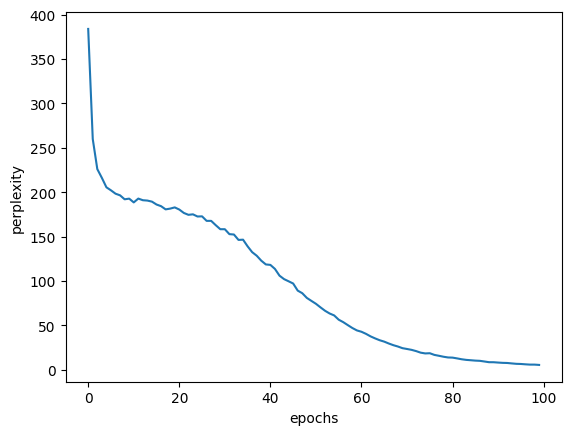

In [8]:
%matplotlib inline
import sys
sys.path.append('..')
import matplotlib.pyplot as plt
import numpy as np
from common.optimizer import SGD
from dataset import ptb


# 하이퍼파라미터 설정
batch_size = 10
wordvec_size = 100
hidden_size = 100 # RNN의 은닉 상태 벡터의 원소 수
time_size = 5     # Truncated BPTT가 한 번에 펼치는 시간 크기
lr = 0.1
max_epoch = 100

# 학습 데이터 읽기(전체 중 1000개만)
corpus, word_to_id, id_to_word = ptb.load_data('train')
corpus_size = 1000
corpus = corpus[:corpus_size]
vocab_size = int(max(corpus) + 1)

xs = corpus[:-1]  # 입력
ts = corpus[1:]   # 출력(정답 레이블)
data_size = len(xs)
print('말뭉치 크기: %d, 어휘 수: %d' % (corpus_size, vocab_size))

# 학습 시 사용하는 변수
max_iters = data_size // (batch_size * time_size)
time_idx = 0
total_loss = 0
loss_count = 0
ppl_list = []

# 모델 생성
model = SimpleRnnlm(vocab_size, wordvec_size, hidden_size)
optimizer = SGD(lr)

# 미니배치의 각 샘플의 읽기 시작 위치를 계산
jump = (corpus_size - 1) // batch_size
offsets = [i * jump for i in range(batch_size)]

for epoch in range(max_epoch):
    for iter in range(max_iters):
        # 미니배치 획득
        batch_x = np.empty((batch_size, time_size), dtype='i')
        batch_t = np.empty((batch_size, time_size), dtype='i')
        for t in range(time_size):
            for i, offset in enumerate(offsets):
                batch_x[i, t] = xs[(offset + time_idx) % data_size]
                batch_t[i, t] = ts[(offset + time_idx) % data_size]
            time_idx += 1

        # 기울기를 구하여 매개변수 갱신
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)
        total_loss += loss
        loss_count += 1

    # 에폭마다 퍼플렉서티 평가
    ppl = np.exp(total_loss / loss_count)
    print('| 에폭 %d | 퍼플렉서티 %.2f'
          % (epoch+1, ppl))
    ppl_list.append(float(ppl))
    total_loss, loss_count = 0, 0

# 그래프 그리기
x = np.arange(len(ppl_list))
plt.plot(x, ppl_list, label='train')
plt.xlabel('epochs')
plt.ylabel('perplexity')
plt.show()

## RNNLM의 Trainer 클래스 

1. 미니배치를 순차적으로 만들어
2. 모델의 순전파와 역전파를 호출하고
3. 옵티마이저로 가중치를 갱신하고 
4. 퍼플렉서티를 구합니다. 

| 에폭 1 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 417.33
| 에폭 2 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 380.56
| 에폭 3 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 260.22
| 에폭 4 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 220.01
| 에폭 5 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 211.16
| 에폭 6 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 209.02
| 에폭 7 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 200.91
| 에폭 8 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 201.87
| 에폭 9 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 196.52
| 에폭 10 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 191.16
| 에폭 11 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 193.18
| 에폭 12 |  반복 1 / 19 | 시간 2[s] | 퍼플렉서티 189.29
| 에폭 13 |  반복 1 / 19 | 시간 2[s] | 퍼플렉서티 193.50
| 에폭 14 |  반복 1 / 19 | 시간 2[s] | 퍼플렉서티 188.31
| 에폭 15 |  반복 1 / 19 | 시간 2[s] | 퍼플렉서티 187.78
| 에폭 16 |  반복 1 / 19 | 시간 3[s] | 퍼플렉서티 190.93
| 에폭 17 |  반복 1 / 19 | 시간 3[s] | 퍼플렉서티 190.13
| 에폭 18 |  반복 1 / 19 | 시간 3[s] | 퍼플렉서티 185.61
| 에폭 19 |  반복 1 / 19 | 시간 4[s] | 퍼플렉서티 182.45
| 에폭 20 |  반복 1 / 19 | 시간 4[s] | 퍼플렉서티 182.40
| 에폭 21 |  반복 1 / 19 | 시간 4[s] | 퍼플렉서티 178.99
| 에폭 22 |  반복 1 / 19 | 시간 4[s] | 퍼플렉서티 178.

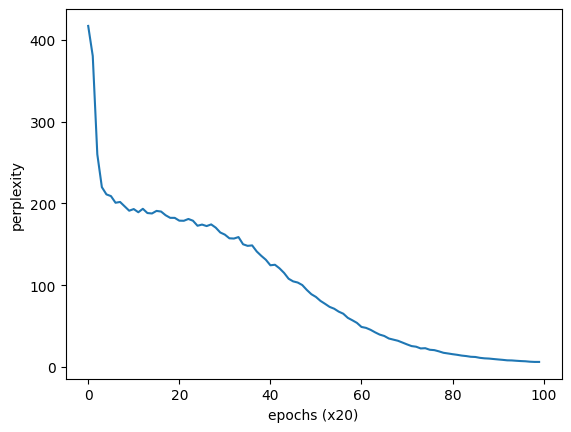

In [9]:
%matplotlib inline
import sys
sys.path.append('..')
from common.optimizer import SGD
from common.trainer import RnnlmTrainer
from dataset import ptb


# 하이퍼파라미터 설정
batch_size = 10
wordvec_size = 100
hidden_size = 100  # RNN의 은닉 상태 벡터의 원소 수
time_size = 5  # RNN을 펼치는 크기
lr = 0.1
max_epoch = 100

# 학습 데이터 읽기
corpus, word_to_id, id_to_word = ptb.load_data('train')
corpus_size = 1000  # 테스트 데이터셋을 작게 설정
corpus = corpus[:corpus_size]
vocab_size = int(max(corpus) + 1)
xs = corpus[:-1]  # 입력
ts = corpus[1:]  # 출력（정답 레이블）

# 모델 생성
model = SimpleRnnlm(vocab_size, wordvec_size, hidden_size)
optimizer = SGD(lr)
trainer = RnnlmTrainer(model, optimizer)

trainer.fit(xs, ts, max_epoch, batch_size, time_size)
trainer.plot()